In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
cd '/content/drive/MyDrive/Seg3D/KiTS2019/kits19'

/content/drive/MyDrive/Seg3D/KiTS2019/kits19


In [ ]:
# !pip install torchio

In [ ]:
from segment.data.prepare_data import get_dataset
from segment.data.data_loaders.processor import DataProcessor

In [ ]:
train_ds, valid_ds = get_dataset(
    data_path="/content/drive/MyDrive/Seg3D/KiTS2019/kits19/output/train_val_data.json", 
    out_path="/content/drive/MyDrive/Seg3D/KiTS2019/kits19/output/data",
    config_path="configs/preprocess_pipeline.yaml",
    fold=1
) 


INFO:segment.utils.file_utils:Saved train dataset at /content/drive/MyDrive/Seg3D/KiTS2019/kits19/output/data/train_dataset.pt
INFO:segment.utils.file_utils:Saved train dataset at /content/drive/MyDrive/Seg3D/KiTS2019/kits19/output/data/valid_dataset.pt


config file:
 {'input_size': [80, 80, 160], 'expand_slice_z': 30, 'expand_slice_y': 15, 'expand_slice_x': 15, 'crop_type': 'random', 'use_bground': False, 'z_range': [35, 80], 'y_range': [100, 165], 'x_range': [55, 200]}


In [ ]:
# [data for data in train_ds]

In [ ]:
# !pip install torchio

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader as load_batch

from segment.data.data_readers.data_reader import DatasetReader

In [ ]:
data = torch.load("/content/drive/MyDrive/Seg3D/KiTS2019/kits19/output/data/train_dataset.pt")

In [ ]:
# use dataloader to avoid random access in dataset
data = next(iter(load_batch(data, batch_size=32)))
volume, seg = data


{'rate_z_axis': 0.66, 'rate_y_axis': 0.71, 'rate_x_axis': 0.88}
{'rate_z_axis': 0.54, 'rate_y_axis': 0.76, 'rate_x_axis': 0.82}
{'rate_z_axis': 0.44, 'rate_y_axis': 0.8, 'rate_x_axis': 0.99}
{'rate_z_axis': 0.52, 'rate_y_axis': 0.78, 'rate_x_axis': 0.87}
{'rate_z_axis': 0.56, 'rate_y_axis': 0.54, 'rate_x_axis': 0.97}
{'rate_z_axis': 0.57, 'rate_y_axis': 0.72, 'rate_x_axis': 0.52}
{'rate_z_axis': 0.45, 'rate_y_axis': 0.71, 'rate_x_axis': 0.95}
{'rate_z_axis': 0.41, 'rate_y_axis': 0.6, 'rate_x_axis': 0.94}
{'rate_z_axis': 0.49, 'rate_y_axis': 0.76, 'rate_x_axis': 0.78}
{'rate_z_axis': 0.41, 'rate_y_axis': 0.79, 'rate_x_axis': 0.8}
{'rate_z_axis': 0.04, 'rate_y_axis': 0.1, 'rate_x_axis': 0.0}
{'rate_z_axis': 0.55, 'rate_y_axis': 0.61, 'rate_x_axis': 0.8}
{'rate_z_axis': 0.57, 'rate_y_axis': 0.64, 'rate_x_axis': 0.77}
{'rate_z_axis': 0.44, 'rate_y_axis': 0.65, 'rate_x_axis': 0.68}
{'rate_z_axis': 0.49, 'rate_y_axis': 0.61, 'rate_x_axis': 0.77}
{'rate_z_axis': 0.46, 'rate_y_axis': 0.66, 'ra

In [ ]:
example = seg[1, 1, ...]
print(example.shape)
np.where(example.sum(dim=(1,2)) > 0)[0]

torch.Size([80, 80, 160])


array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [ ]:
def check_nonzero_slice(item):
    organ_arr, tumor_arr = item[0, ...], item[1, ...]
    organ_func = DatasetReader.locate_nonzero_slice(organ_arr, t=0, return_rate=False)
    tumor_func = DatasetReader.locate_nonzero_slice(tumor_arr, t=0, return_rate=False)
    return organ_func, tumor_func

result = list(map(check_nonzero_slice, seg))


({'nonzero_z_min': 10, 'nonzero_z_max': 63, 'nonzero_y_min': 22, 'nonzero_y_max': 79, 'nonzero_x_min': 13, 'nonzero_x_max': 153}, {'nonzero_z_min': 47, 'nonzero_z_max': 60, 'nonzero_y_min': 49, 'nonzero_y_max': 73, 'nonzero_x_min': 131, 'nonzero_x_max': 159})
({'nonzero_z_min': 9, 'nonzero_z_max': 52, 'nonzero_y_min': 0, 'nonzero_y_max': 61, 'nonzero_x_min': 10, 'nonzero_x_max': 142}, {'nonzero_z_min': 17, 'nonzero_z_max': 26, 'nonzero_y_min': 8, 'nonzero_y_max': 25, 'nonzero_x_min': 129, 'nonzero_x_max': 148})
({'nonzero_z_min': 31, 'nonzero_z_max': 64, 'nonzero_y_min': 0, 'nonzero_y_max': 57, 'nonzero_x_min': 0, 'nonzero_x_max': 146}, {'nonzero_z_min': 41, 'nonzero_z_max': 61, 'nonzero_y_min': 12, 'nonzero_y_max': 39, 'nonzero_x_min': 126, 'nonzero_x_max': 145})
({'nonzero_z_min': 29, 'nonzero_z_max': 71, 'nonzero_y_min': 4, 'nonzero_y_max': 66, 'nonzero_x_min': 15, 'nonzero_x_max': 154}, {'nonzero_z_min': 30, 'nonzero_z_max': 39, 'nonzero_y_min': 26, 'nonzero_y_max': 42, 'nonzero_x_

idc: 7
{'nonzero_z_min': 16, 'nonzero_z_max': 49, 'nonzero_y_min': 24, 'nonzero_y_max': 72, 'nonzero_x_min': 3, 'nonzero_x_max': 153}
{'nonzero_z_min': 33, 'nonzero_z_max': 43, 'nonzero_y_min': 29, 'nonzero_y_max': 48, 'nonzero_x_min': 98, 'nonzero_x_max': 116}
torch.Size([80, 80, 160])
torch.Size([80, 80, 160])
random_pos: 62


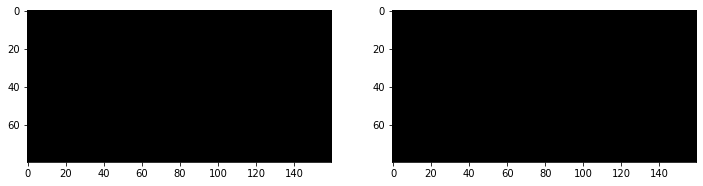

In [ ]:
idc = np.random.choice(len(seg))
print("idc:", idc)
print(result[idc][0])
print(result[idc][1])

random_organ_arr, random_tumor_arr = seg[idc][0], seg[idc][1]

print(random_organ_arr.shape)
print(random_tumor_arr.shape)

random_pos = np.random.choice(random_tumor_arr.shape[0])
print("random_pos:", random_pos)

_, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(random_organ_arr[random_pos], cmap=plt.cm.gray)
axes[1].imshow(random_tumor_arr[random_pos], cmap=plt.cm.gray)
plt.show()
